In [1]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/df-claim-A.csv')
df_claim=df[["ID","Title","Claim","cpc_subclass"]]
df_claim= df_claim.dropna()
df_claim = df_claim.reset_index(drop=True)
df_claim.head()

,ID,Title,Claim,cpc_subclass
0,8927300,Method and compositions for the detection of p...,1. A compound of the formula: wherein R is a s...,"C07H,C07K,C12N,C12Q,G01N"
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
3,8925531,Spark plug degradation detection,1. A method of controlling an engine cylinder ...,"F02D,F02P,Y02T"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"


In [2]:
len(df_claim)

1428600

In [3]:
df_claim_uspto = df_claim_uspto = df_claim[df_claim['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
6,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
7,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [4]:
#df_claim=df_claim[["grant_id","patent_title","claims_text","abstract", "main_classification"]]
df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()
df_claim_uspto = df_claim_uspto.reset_index(drop=True)
df_claim_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_22536/1681520836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()


,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [5]:
df_claim_uspto=df_claim_uspto[:60000]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


# preprocessing

In [6]:
def cleantext(df_claim_uspto): 
    
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
    
    #remove numbers
    df_claim_uspto['cleaned_claims_text'] =df_claim_uspto['cleaned_claims_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'https.*$', "", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("   ", " ", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("  ", " ", regex = True)
   
    return df_claim_uspto

df_claim_uspto = cleantext(df_claim_uspto)
df_claim_uspto.head()

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\dtypes\inference.py:181: FutureWarning: Possible nested set at position 1
  re.compile(obj)


,ID,Title,Claim,cpc_subclass,cleaned_claims_text
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...


In [7]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_claim_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...


In [8]:
# Import the necessary library
from nltk.stem import WordNetLemmatizer

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize each word in a given text
def lemmatize_words(text):
    # Split the text into individual words
    words = text.split()
    # Apply lemmatization to each word and join them back into a string
    return " ".join([lemmatizer.lemmatize(word) for word in words])

# Apply the lemmatize_words function to the 'cleaned_claim_text_without_Stopwprd' column of the dataframe
df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# Print the resulting dataframe with the added 'Lemmatized-Cliam' column
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...


In [ ]:
import matplotlib.pyplot as plt

patent_stop_words = ["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"]
all_words = []
stop_words_in_dataset = []
patent_stop_words_in_dataset = []
main_data = []

for claim in df_claim_uspto['cleaned_claims_text']:
    words = claim.split()
    all_words += words
    stop_words_in_claim = [word for word in words if word in stop_words]
    stop_words_in_dataset += stop_words_in_claim
    patent_stop_words_in_claim = [word for word in words if word in patent_stop_words]
    patent_stop_words_in_dataset += patent_stop_words_in_claim
    main_data.append(" ".join([word for word in words if word not in stop_words and word not in patent_stop_words]))


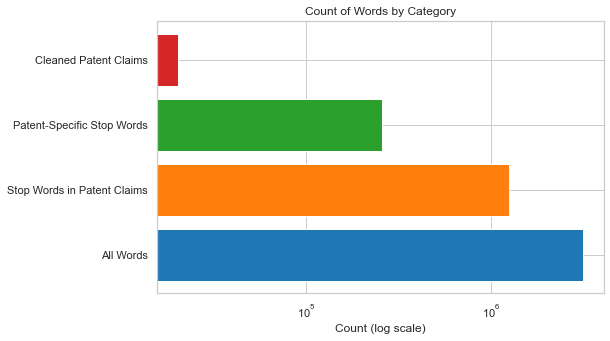

In [53]:
# Calculate the count of each category
all_words_count = len(all_words)
stop_words_count = len(stop_words_in_dataset)
patent_stop_words_count = len(patent_stop_words_in_dataset)
main_data_count = len(main_data)

# Plot a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
categories = ['All Words', 'Stop Words in Patent Claims', 'Patent-Specific Stop Words', 'Cleaned Patent Claims']
counts = [all_words_count, stop_words_count, patent_stop_words_count, main_data_count]
ax.barh(categories, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax.set_xscale('log')
ax.set_xlabel('Count (log scale)')
ax.set_title('Count of Words by Category')
plt.show()


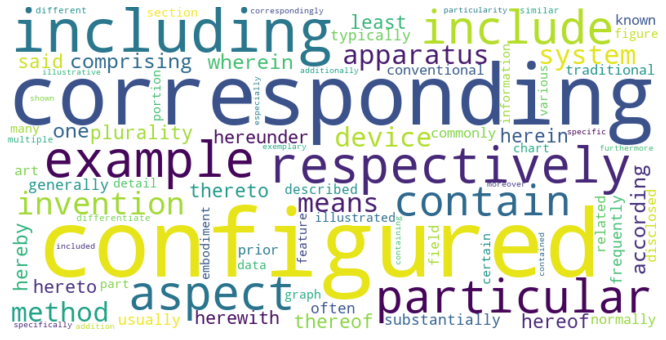

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of patent-specific stop words
patent_stop_words_str = ' '.join(patent_stop_words)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(patent_stop_words_str)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [69]:
lemm_stem = (df_claim_uspto['cleaned_claim_text_without_Stopwprd'].iloc[0])
lemm_stem

'advertising displaying television program video display retrieving social network posts one social networks identified storage television receiver devices social media registry displaying social network thumbnails array thumbnails overlaying television program video display social network thumbnails represent social network videos received social media posts linked social network posts using advertisement retrieval program television receiver select advertisement advertisement server representing selected advertisement thumbnail representation displaying advertisement thumbnail representation within array thumbnails video display displaying advertisement thumbnail comprises displaying one advertisement thumbnail every ad value social network thumbnails ad value integer changes randomly pseudorandomly within predefined range receiving instruction selecting one thumbnails navigate responsive displaying either one social network videos advertisement'

In [84]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a sample text
text = "advertising displaying television program video display retrieving social network posts one social networks identified storage television receiver devices social media registry displaying social network thumbnails array thumbnails overlaying television program video display social network thumbnails represent social network videos received social media posts linked social network posts using advertisement retrieval program television receiver select advertisement advertisement server representing selected advertisement thumbnail representation displaying advertisement thumbnail representation within array thumbnails video display displaying advertisement thumbnail comprises displaying one advertisement thumbnail every ad value social network thumbnails ad value integer changes randomly pseudorandomly within predefined range receiving instruction selecting one thumbnails navigate responsive displaying either one social network videos advertisement"

# Tokenize the text into individual words and tags
words = nltk.word_tokenize(text)
tags = nltk.pos_tag(words)

# Initialize a list to store the main verbs
main_verbs = []

# Create a new string to store the highlighted text
highlighted_text = ""

# Loop through the words and tags, and identify the main verbs
for i in range(len(tags)):
    if tags[i][1].startswith('VB') and (i == len(tags)-1 or not tags[i+1][1].startswith('VB')):
        main_verbs.append(tags[i][0])
        highlighted_text += "\033[43m\033[30m[" + tags[i][0] + "]\033[0m" + " "
    else:
        highlighted_text += tags[i][0] + " "
# Print the original text with highlighted main verbs
print(highlighted_text)

# Initialize lists to store the stemmed and lemmatized verbs
stemmed_verbs = []
lemmatized_verbs = []

# Loop through the main verbs and apply stemming and lemmatization
for verb in main_verbs:
    stemmed_verb = stemmer.stem(verb)
    lemmatized_verb = lemmatizer.lemmatize(verb, pos='v')
    stemmed_verbs.append(stemmed_verb)
    lemmatized_verbs.append(lemmatized_verb)

# Print the stemmed and lemmatized verbs with differences
print("\n{:<20} {:<20} {:<20}".format("Original", "Stemmed", "Lemmatized"))
for i in range(len(stemmed_verbs)):
    print("{:<20} {:<20} {:<20}".format(main_verbs[i], stemmed_verbs[i], lemmatized_verbs[i]))

advertising [displaying] television program video display [retrieving] social network posts one social networks [identified] storage television receiver devices social media registry [displaying] social network thumbnails array thumbnails [overlaying] television program video [display] social network thumbnails [represent] social network videos [received] social media posts [linked] social network posts [using] advertisement retrieval program television receiver [select] advertisement advertisement server representing [selected] advertisement thumbnail representation [displaying] advertisement thumbnail representation within array thumbnails [video] display [displaying] advertisement thumbnail comprises [displaying] one advertisement thumbnail every ad value social network thumbnails ad value integer changes randomly pseudorandomly within [predefined] range [receiving] instruction [selecting] one thumbnails navigate responsive [displaying] either one social network videos advertisement

In [86]:
main_cliam = (df_claim_uspto['Claim'].iloc[0])
main_cliam

"1. An advertising method, comprising: displaying a television program on a video display; retrieving a plurality of social network posts from one or more social networks identified by storage in a television receiver device's social media registry; displaying a plurality of social network thumbnails as an array of thumbnails overlaying the television program on the video display, where said plurality of social network thumbnails represent social network videos that are received in the plurality of social media posts or which are linked to social network posts; using an advertisement retrieval program of the television receiver device to select an advertisement from an advertisement server; representing the selected advertisement as a thumbnail representation; displaying the advertisement thumbnail representation within the array of thumbnails on the video display; where displaying the advertisement thumbnail comprises displaying one advertisement thumbnail for every AD VALUE social ne

In [155]:
pre_cliam = (df_claim_uspto['Lemmatized-Claim'].iloc[0])
pre_cliam

'advertising displaying television program video display retrieving social network post one social network identified storage television receiver device social medium registry displaying social network thumbnail array thumbnail overlaying television program video display social network thumbnail represent social network video received social medium post linked social network post using advertisement retrieval program television receiver select advertisement advertisement server representing selected advertisement thumbnail representation displaying advertisement thumbnail representation within array thumbnail video display displaying advertisement thumbnail comprises displaying one advertisement thumbnail every ad value social network thumbnail ad value integer change randomly pseudorandomly within predefined range receiving instruction selecting one thumbnail navigate responsive displaying either one social network video advertisement'

In [164]:
from difflib import Differ
from termcolor import colored

# Define the original text
original_text = "1. An advertising method, comprising: displaying a television program on a video display; retrieving a plurality of social network posts from one or more social networks identified by storage in a television receiver device's social media registry; displaying a plurality of social network thumbnails as an array of thumbnails overlaying the television program on the video display, where said plurality of social network thumbnails represent social network videos that are received in the plurality of social media posts or which are linked to social network posts; using an advertisement retrieval program of the television receiver device to select an advertisement from an advertisement server; representing the selected advertisement as a thumbnail representation; displaying the advertisement thumbnail representation within the array of thumbnails on the video display; where displaying the advertisement thumbnail comprises displaying one advertisement thumbnail for every AD VALUE social network thumbnails, where AD VALUE is an integer that changes randomly or pseudo-randomly within a predefined range; and receiving an instruction selecting one of the thumbnails to navigate to and responsive thereto displaying either one of the social network videos or the advertisement."

# Perform preprocessing on the text
processed_text = "advertising displaying television program video display retrieving social network post one social network identified storage television receiver device social medium registry displaying social network thumbnail array thumbnail overlaying television program video display social network thumbnail represent social network video received social medium post linked social network post using advertisement retrieval program television receiver select advertisement advertisement server representing selected advertisement thumbnail representation displaying advertisement thumbnail representation within array thumbnail video display displaying advertisement thumbnail comprises displaying one advertisement thumbnail every ad value social network thumbnail ad value integer change randomly pseudorandomly within predefined range receiving instruction selecting one thumbnail navigate responsive displaying either one social network video advertisement"

# Define the differ object
d = Differ()

# Compare the original text and the processed text
diff = list(d.compare(original_text.split(), processed_text.split()))

# Create a list to hold the formatted output
output = []

# Loop through the diff list and format the changes
for i in range(len(diff)):
    if diff[i][0] == ' ':
        output.append(diff[i])
    elif diff[i][0] == '+':
        output.append(colored(diff[i], 'green', attrs=["bold", "underline"]))
    elif diff[i][0] == '-':
        output.append(colored(diff[i], 'red', attrs=["bold", "underline"]))

# Join the output list back into a single string
output_str = ' '.join(output)

# Display the original text and the processed text with highlighted changes
print("Claim text:")
print(original_text)
print("\nProcessed Claim:")
print(processed_text)
print("\nChanges:")
print(output_str)


Claim text:
1. An advertising method, comprising: displaying a television program on a video display; retrieving a plurality of social network posts from one or more social networks identified by storage in a television receiver device's social media registry; displaying a plurality of social network thumbnails as an array of thumbnails overlaying the television program on the video display, where said plurality of social network thumbnails represent social network videos that are received in the plurality of social media posts or which are linked to social network posts; using an advertisement retrieval program of the television receiver device to select an advertisement from an advertisement server; representing the selected advertisement as a thumbnail representation; displaying the advertisement thumbnail representation within the array of thumbnails on the video display; where displaying the advertisement thumbnail comprises displaying one advertisement thumbnail for every AD VALU

In [166]:
!pip install rich

     -------------------------------------- 238.7/238.7 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [175]:
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...


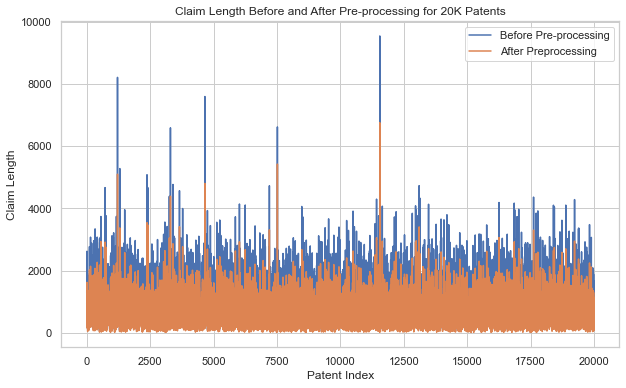

In [186]:
import matplotlib.pyplot as plt

# Calculate text length for each patent before and after pre-processing
before_len = df_claim_uspto['Claim'][:20000].str.len()
after_len = df_claim_uspto['Lemmatized-Claim'][:20000].str.len()

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(before_len, label='Before Pre-processing')
ax.plot(after_len, label='After Preprocessing')

# Add labels to the chart
ax.set_title('Claim Length Before and After Pre-processing for 20K Patents')
ax.set_xlabel('Patent Index')
ax.set_ylabel('Claim Length')
ax.legend()

# Display the chart
plt.show()

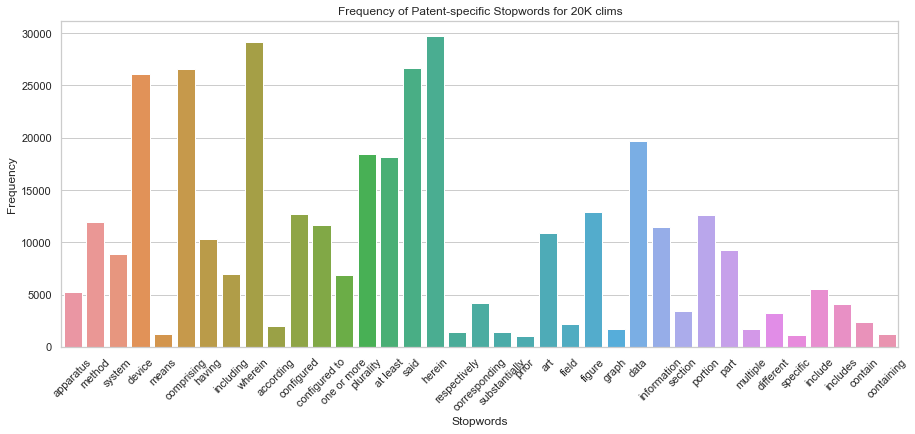

In [42]:
import seaborn as sns
import pandas as pd

# Define your list of stop words
patent_stop_words = ["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"]

# Count the frequency of each stopword in the dataset
stopword_freq = {}
for word in patent_stop_words:
    stopword_freq[word] = df_claim_uspto['Claim'][:20000].str.count(word).sum()

# Convert the stopword frequency dictionary to a dataframe
df_stopword_freq = pd.DataFrame(stopword_freq.items(), columns=['Stopword', 'Frequency'])
df_stopword_freq = df_stopword_freq[df_stopword_freq['Frequency'] >= 1000]
# Create a bar plot to show the frequency of each stopword
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_style("whitegrid")
sns.barplot(x='Stopword', y='Frequency', data=df_stopword_freq, ax=ax)
plt.xticks(rotation=45)
plt.title('Frequency of Patent-specific Stopwords for 20K clims')
plt.xlabel('Stopwords')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [219]:
#with preprocessing

In [9]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=15, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=5, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.4)

#c-TF-IDF
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

#Run Model
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       #diversity=None,
                       verbose=True)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df_claim_uspto['Lemmatized-Claim'][:20000])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-19 09:22:27,058 - BERTopic - Transformed documents to Embeddings
2023-03-19 09:23:15,537 - BERTopic - Reduced dimensionality
2023-03-19 09:23:18,298 - BERTopic - Clustered reduced embeddings


In [10]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_uspto['Lemmatized-Claim'][:20000],
                          "ID": range(len(df_claim_uspto['Lemmatized-Claim'][:20000])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]


# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_c_nmpi = coherence_model.get_coherence()
print("c_npmi is: ",coherence_c_nmpi)

c_npmi is:  -0.01650351528141517


In [11]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_claim_uspto['Lemmatized-Claim'][:20000],
                          "ID": range(len( df_claim_uspto['Lemmatized-Claim'][:20000])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.4900338032300747


In [12]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_claim_uspto['Lemmatized-Claim'][:20000],
                          "ID": range(len(df_claim_uspto['Lemmatized-Claim'][:20000])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass= coherence_model.get_coherence()
print("u_mass is: ", coherence_u_mass)

u_mass is:  -1.048902847586541


In [13]:
#without preprocessing

In [14]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=15, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=5, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.4)

#c-TF-IDF
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

#Run Model
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       #diversity=None,
                       verbose=True)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df_claim_uspto['Claim'][:20000])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-19 09:48:14,195 - BERTopic - Transformed documents to Embeddings
2023-03-19 09:48:36,833 - BERTopic - Reduced dimensionality
2023-03-19 09:48:39,788 - BERTopic - Clustered reduced embeddings


In [15]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_uspto['Claim'][:20000],
                          "ID": range(len(df_claim_uspto['Claim'][:20000])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]


# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_c_nmpi = coherence_model.get_coherence()
print("c_npmi is: ",coherence_c_nmpi)

c_npmi is:  -0.11490783198090908


In [16]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_claim_uspto['Claim'][:20000],
                          "ID": range(len( df_claim_uspto['Claim'][:20000])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.3525086606230392


In [17]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_claim_uspto['Claim'][:20000],
                          "ID": range(len(df_claim_uspto['Claim'][:20000])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass= coherence_model.get_coherence()
print("u_mass is: ", coherence_u_mass)

u_mass is:  -1.0955220584331418


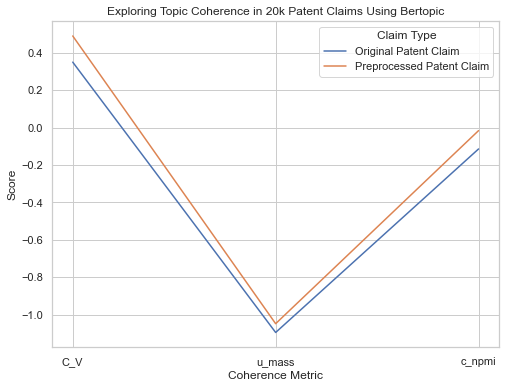

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data
coherence_metrics = ['C_V', 'u_mass', 'c_npmi']
original_scores = [0.35, -1.095, -0.114]
preprocessed_scores = [0.49, -1.048, -0.016]

# Create dataframe
df = pd.DataFrame({'Coherence Metric': coherence_metrics,
                   'Original Patent Claim': original_scores,
                   'Preprocessed Patent Claim': preprocessed_scores})

# Melt dataframe
melted_df = pd.melt(df, id_vars='Coherence Metric', var_name='Claim Type', value_name='Score')

# Create line chart
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x='Coherence Metric', y='Score', hue='Claim Type', data=melted_df)
plt.title('Exploring Topic Coherence in 20k Patent Claims Using Bertopic')
plt.ylabel('Score')
plt.xlabel('Coherence Metric')

plt.show()


In [21]:
# comparison for Abstract

In [22]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/AbstractDataset/df-Abstract.csv')
df = df.rename(columns={'No': 'ID', 'Title': 'Title', 'Abstract': 'Abstract', 'Subclass_labels': 'cpc_subclass'})
df_Abstract=df[["ID","Title","Abstract","cpc_subclass"]]
df_Abstract= df_Abstract.dropna()
df_Abstract = df_Abstract.reset_index(drop=True)
df_Abstract.head()

,ID,Title,Abstract,cpc_subclass
0,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,['G11B']
1,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,['A41D']
2,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,['A41D']
3,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,['A63B']
4,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,['E03D']


In [23]:
df_Abstract_uspto = df_Abstract[df_Abstract['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_Abstract_uspto

,ID,Title,Abstract,cpc_subclass
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
2000104,US08975581,ion trap,an ion trap comprising a first array of magnet...,['H01J']
2000106,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"['G09G', 'G03B', 'H01S', 'H04N']"
2000107,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"['H05K', 'H01R']"
2000108,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"['H04J', 'G01R']"


In [24]:
df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()
df_Abstract_uspto = df_Abstract_uspto.reset_index(drop=True)
df_Abstract_uspto

,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
595461,US08975581,ion trap,an ion trap comprising a first array of magnet...,['H01J']
595462,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"['G09G', 'G03B', 'H01S', 'H04N']"
595463,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"['H05K', 'H01R']"
595464,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"['H04J', 'G01R']"


In [25]:
df_Abstract_uspto=df_Abstract_uspto[:60000]
df_Abstract_uspto

,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
59995,US07294937,apparatus and method for manufacturing a semic...,a multi layered semiconductor structure with f...,['H01L']
59996,US07262721,methods of and apparatuses for adaptive entrop...,methods and apparatuses are provided for adapt...,['H03M']
59997,US07260826,resource allocation in multi stream ip network...,a resource allocation of multiple compressed a...,['H04N']
59998,US07231525,authentification of data in a digital transmis...,a method of authentification of data sent in a...,"['G06F', 'H04L']"


# preprocessing

In [27]:
def cleantext(df_Abstract_uspto): 
    
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
    
    #remove numbers
    df_Abstract_uspto['cleaned_Abstract_text'] =df_Abstract_uspto['cleaned_Abstract_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'https.*$', "", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("   ", " ", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("  ", " ", regex = True)
   
    return df_Abstract_uspto

df_Abstract_uspto = cleantext(df_Abstract_uspto)
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...


In [28]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_Abstract_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...


In [29]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...


In [30]:
#Divide the dataset into different size
df_Abstract_20K=df_Abstract_uspto[:20000]
df_Abstract_20K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...
...,...,...,...,...,...,...,...
19995,US07050507,adaptive throughput pulse width modulation com...,a signaling apparatus and system may include a...,['H04L'],a signaling apparatus and system may include a...,signaling may transmitter capable sending stro...,signaling may transmitter capable sending stro...
19996,US07050508,method and system for frequency up conversion ...,a method and system is described wherein a sig...,"['H04B', 'H01Q']",a method and system is described wherein a sig...,signal lower frequency converted higher freque...,signal lower frequency converted higher freque...
19997,US07050509,digital isolation system with hybrid circuit i...,an improved digital capacitive isolation barri...,['H04B'],an improved digital capacitive isolation barri...,improved digital capacitive isolation barrier ...,improved digital capacitive isolation barrier ...
19998,US07050510,open loop diversity technique for systems empl...,when using four transmit antennas conventional...,"['H04B', 'H04L']",when using four transmit antennas conventional...,using four transmit antennas channel coding em...,using four transmit antenna channel coding emp...


In [31]:
# with preprocessing for abstract

In [32]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=15, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=5, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.4)

#c-TF-IDF
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

#Run Model
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       #diversity=None,
                       verbose=True)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df_Abstract_20K['Lemmatized-Abstract'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-19 11:21:28,602 - BERTopic - Transformed documents to Embeddings
2023-03-19 11:21:54,030 - BERTopic - Reduced dimensionality
2023-03-19 11:21:56,661 - BERTopic - Clustered reduced embeddings


In [33]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_Abstract_20K['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract_20K['Lemmatized-Abstract'])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]


# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_c_nmpi = coherence_model.get_coherence()
print("c_npmi is: ",coherence_c_nmpi)

c_npmi is:  -0.004042889645229586


In [34]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_Abstract_20K['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract_20K['Lemmatized-Abstract'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5305406080903126


In [35]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_Abstract_20K['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract_20K['Lemmatized-Abstract'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass= coherence_model.get_coherence()
print("u_mass is: ", coherence_u_mass)

u_mass is:  -1.1333585847764867


In [36]:
#without preprcossessing

In [37]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=15, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=5, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.4)

#c-TF-IDF
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

#Run Model
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       #diversity=None,
                       verbose=True)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df_Abstract_20K['Abstract'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-19 11:44:43,037 - BERTopic - Transformed documents to Embeddings
2023-03-19 11:45:05,274 - BERTopic - Reduced dimensionality
2023-03-19 11:45:08,123 - BERTopic - Clustered reduced embeddings


In [38]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_Abstract_20K['Abstract'],
                          "ID": range(len(df_Abstract_20K['Abstract'])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]


# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_c_nmpi = coherence_model.get_coherence()
print("c_npmi is: ",coherence_c_nmpi)

c_npmi is:  -0.09064832440948373


In [39]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_Abstract_20K['Abstract'],
                          "ID": range(len(df_Abstract_20K['Abstract'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.3823699358526753


In [40]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_Abstract_20K['Abstract'],
                          "ID": range(len(df_Abstract_20K['Abstract'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass= coherence_model.get_coherence()
print("u_mass is: ", coherence_u_mass)

u_mass is:  -1.0969025634060325


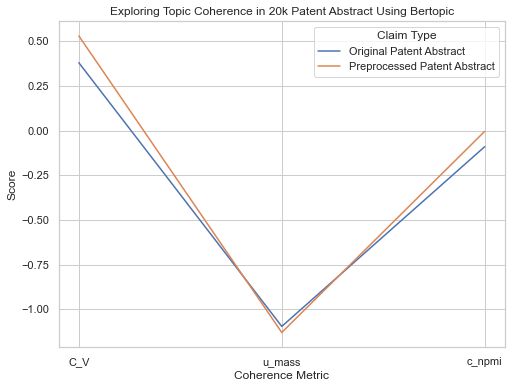

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data
coherence_metrics = ['C_V', 'u_mass', 'c_npmi']
original_scores = [0.38, -1.096, -0.090]
preprocessed_scores = [0.53, -1.13, -0.004] 

# Create dataframe
df = pd.DataFrame({'Coherence Metric': coherence_metrics,
                   'Original Patent Abstract': original_scores,
                   'Preprocessed Patent Abstract': preprocessed_scores})

# Melt dataframe
melted_df = pd.melt(df, id_vars='Coherence Metric', var_name='Claim Type', value_name='Score')

# Create line chart
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x='Coherence Metric', y='Score', hue='Claim Type', data=melted_df)
plt.title('Exploring Topic Coherence in 20k Patent Abstract Using Bertopic')
plt.ylabel('Score')
plt.xlabel('Coherence Metric')

plt.show()